In [122]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

Comprehensive Guide to Loss Functions in Deep Learning

In this notebook, we will explore some of the most important loss functions in deep learning, understand their mathematical formulations, practical uses, advantages, and disadvantages. Additionally, we will implement these loss functions in Python using PyTorch and visualize their behavior.

## Mean Squared Error (MSE) Loss

### Definition and Mathematical Formulation

The Mean Squared Error (MSE) Loss is commonly used for regression tasks. It is defined as:
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
where $y_i$ are the actual values and $\hat{y}_i$ are the predicted values.

**Use case**: MSE is suitable for regression problems where we want to penalize large errors more heavily.

**Advantages**:
- Simple to implement and compute.
- Heavily penalizes larger errors, making it suitable for problems where large errors are undesirable.

**Disadvantages**:
- Sensitive to outliers due to the squared term.

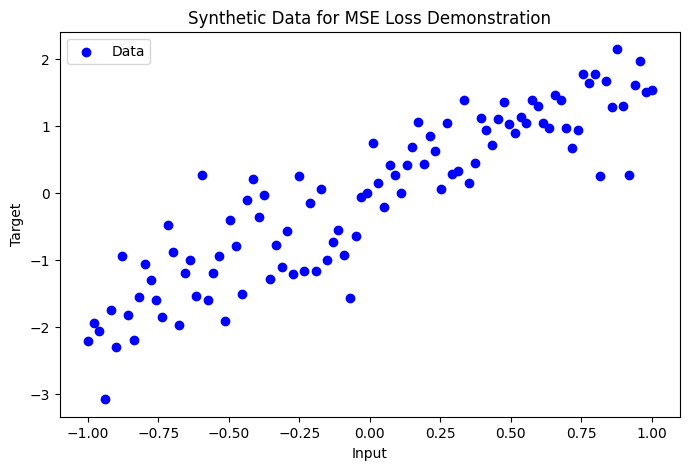

In [7]:
x = torch.linspace(-1, 1, 100).reshape(-1, 1)
y = 2 * x + 0.5 * torch.randn(x.size())

plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label="Data", color="blue")
plt.title("Synthetic Data for MSE Loss Demonstration")
plt.xlabel("Input")
plt.ylabel("Target")
plt.legend()
plt.show()
    

In [8]:
model = nn.Sequential(nn.Linear(1, 1))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
def mse(x,y):
    sum_errors =  sum((x-y)**2)
    avg_errors = sum_errors / len(x)
    return avg_errors

In [10]:
t_x = torch.tensor([1,2,3], dtype=torch.float32)
t_y = torch.tensor([4,5,6], dtype=torch.float32)

In [11]:
mse(t_x, t_y) == criterion(t_x, t_y)

tensor(True)

In [12]:
mse(t_x, t_y)

tensor(9.)

In [13]:
epochs = 300
loss_values = []

for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x)
    loss = criterion(predictions, y)
    loss_values.append(loss.item())
    loss.backward()
    optimizer.step()

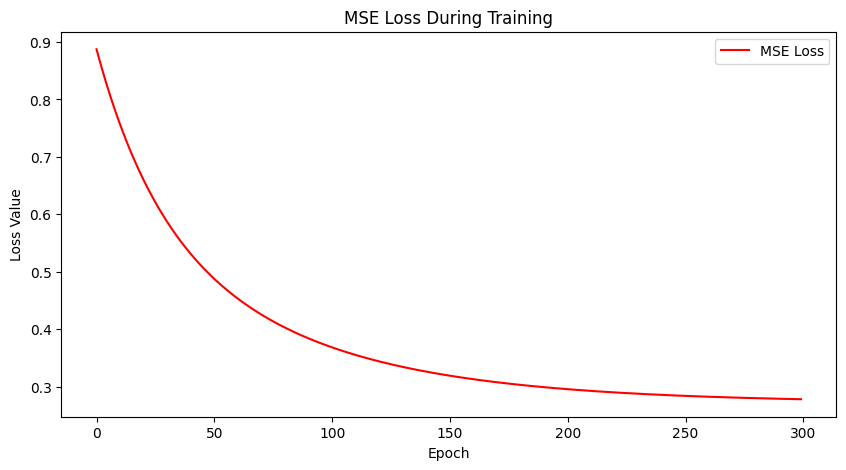

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label="MSE Loss", color="red")
plt.title("MSE Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.show()    

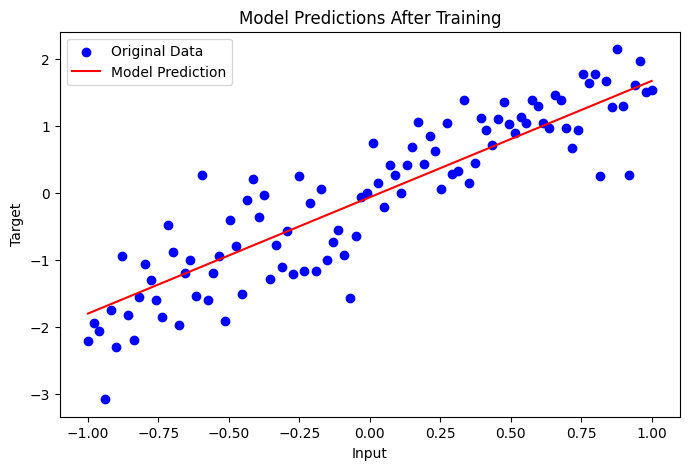

In [15]:
model.eval()
with torch.no_grad():
    predicted = model(x)

plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label="Original Data", color="blue")
plt.plot(x.numpy(), predicted.numpy(), label="Model Prediction", color="red")
plt.title("Model Predictions After Training")
plt.xlabel("Input")
plt.ylabel("Target")
plt.legend()
plt.show()
    

## 2. Mean Absolute Error (MAE) Loss

### Definition and Mathematical Formulation

The Mean Absolute Error (MAE) Loss is defined as:
$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

**Use case**: MAE is useful when we want to reduce the impact of outliers.

**Advantages**:
- Robust to outliers.
- Provides a more interpretable error measure.

**Disadvantages**:
- Not differentiable at $y_i = \hat{y}_i$, which can be problematic for gradient-based optimization.

In [16]:
criterion_mae = nn.L1Loss()

In [17]:
def mae(x,y):
    sum_absolute_errors = sum(abs(x-y))
    return sum_absolute_errors / len(x)

In [18]:
mae(t_x, t_y) == criterion_mae(t_x, t_y)

tensor(True)

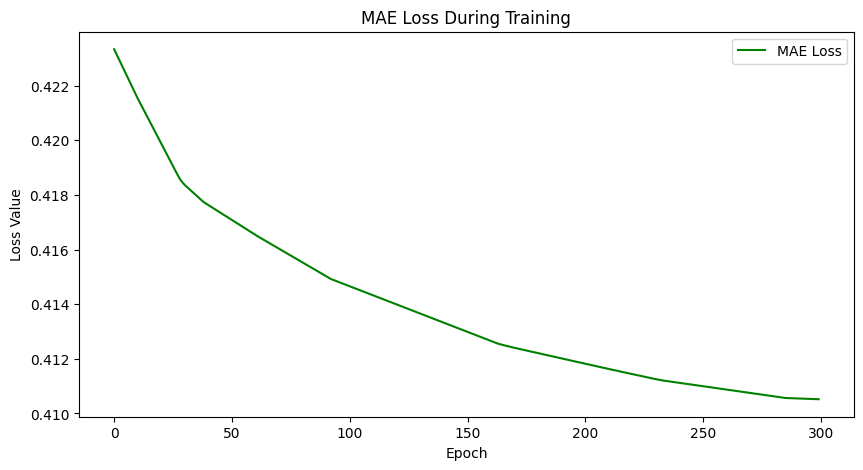

In [19]:
criterion_mae = nn.L1Loss()
loss_values_mae = []

for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x)
    loss = criterion_mae(predictions, y)
    loss_values_mae.append(loss.item())
    loss.backward()
    optimizer.step()

plt.figure(figsize=(10, 5))
plt.plot(loss_values_mae, label="MAE Loss", color="green")
plt.title("MAE Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.show()
    

## Binary Cross-Entropy Loss (Log Loss)

### Definition and Mathematical Formulation

Binary Cross-Entropy Loss is used for binary classification tasks. It is defined as:
$$ \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$
where $y_i$ are the actual binary labels and $\hat{y}_i$ are the predicted probabilities.

**Use case**: Ideal for binary classification tasks like spam detection or medical diagnoses.

**Advantages**:
- Directly operates on probabilities.
- Provides a strong gradient for learning.

**Disadvantages**:
- Sensitive to class imbalance, requiring careful handling or balancing.

In [20]:
torch.manual_seed(0)
x_binary = torch.randn(100, 2)
y_binary = (x_binary[:, 0] + x_binary[:, 1] > 0).float().reshape(-1, 1)

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
def binary_cross_entropy(x, y):
    probabilities = sigmoid(x)
    y_pred = np.clip(probabilities, 1e-10, 1 - 1e-14)
    loss = -torch.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

Cross entropy expects to receives probabilities (e.g. numbers from 0 + epsilon to 1).

In [23]:
probabilities = sigmoid(x)
y_pred = np.clip(probabilities, 1e-10, 1 - 1e-14)

In [24]:
binary_cross_entropy(x, y_binary)

tensor(0.7809)

In [25]:
probs = sigmoid(x)

In [29]:
criterion_bce = nn.BCELoss()

In [30]:
binary_cross_entropy(x, y_binary) == criterion_bce(probs, y_binary)

tensor(True)

In [31]:
model_binary = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
criterion_bce = nn.BCELoss()
optimizer_binary = torch.optim.SGD(model_binary.parameters(), lr=0.1)

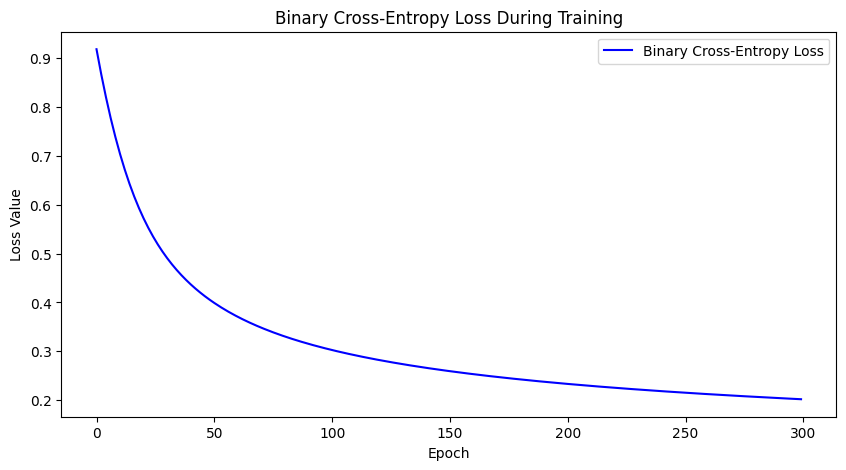

In [32]:
epochs = 300
loss_values_bce = []

for epoch in range(epochs):
    optimizer_binary.zero_grad()
    outputs = model_binary(x_binary)
    loss = criterion_bce(outputs, y_binary)
    loss_values_bce.append(loss.item())
    loss.backward()
    optimizer_binary.step()

plt.figure(figsize=(10, 5))
plt.plot(loss_values_bce, label="Binary Cross-Entropy Loss", color="blue")
plt.title("Binary Cross-Entropy Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.show()
    

## Categorical Cross-Entropy Loss

### Definition and Mathematical Formulation

Categorical Cross-Entropy Loss is used for multi-class classification problems. It is defined as:
$$ \text{CCE} = -\sum_{i=1}^{n} \sum_{j=1}^{k} y_{ij} \log(\hat{y}_{ij}) $$
where $y_{ij}$ is 1 if the sample $i$ belongs to class $j$, and $\hat{y}_{ij}$ is the predicted probability for class $j$.

**Use case**: Suitable for multi-class problems such as digit classification (MNIST) or object recognition.

**Advantages**:
- Works well with softmax output for multi-class classification.
- Provides clear gradients for each class.

**Disadvantages**:
- Can struggle with large class imbalances. As the loss is calculated over all predictions, even if we get a few wrong, we can still get a good grade.

In [40]:
x_multi = torch.randn(150, 3)
y_multi = torch.randint(0, 3, (150,))

In [512]:
y_true = torch.tensor([0, 1, 2])

y_pred = torch.tensor([[2.0, 1.0, 0.1],
                       [0.5, 2.5, 0.3],
                       [0.3, 0.7, 3.0]])

In [536]:
def softmax(y_pred):
    
    softmax_pred = torch.exp(y_pred) / torch.exp(y_pred).sum(dim=1, keepdim=True)
    epsilon = 1e-15
    softmax_pred = torch.clamp(softmax_pred, epsilon, 1 - epsilon)
    
    return softmax_pred

In [537]:
def cross_entropy_loss(y_pred, y_true):
    
    softmax_pred = softmax(y_pred)
    
    log_pred = torch.log(softmax_pred)  
    
    
    loss_values = []
    
    number_of_idxs_in_y_true = len(y_true)
    
    for i in range(number_of_idxs_in_y_true):
        loss_values.append(-log_pred[i, y_true[i]])

    loss = torch.tensor(loss_values)

    return loss.mean()

In [538]:
cross_entropy_loss(y_pred, y_true)

tensor(0.2640)

In [539]:
loss_func = nn.CrossEntropyLoss()
loss_func(y_pred, y_true)

tensor(0.2640)

In [540]:
loss_func(y_pred, y_true) == cross_entropy_loss(y_pred, y_true)

tensor(False)

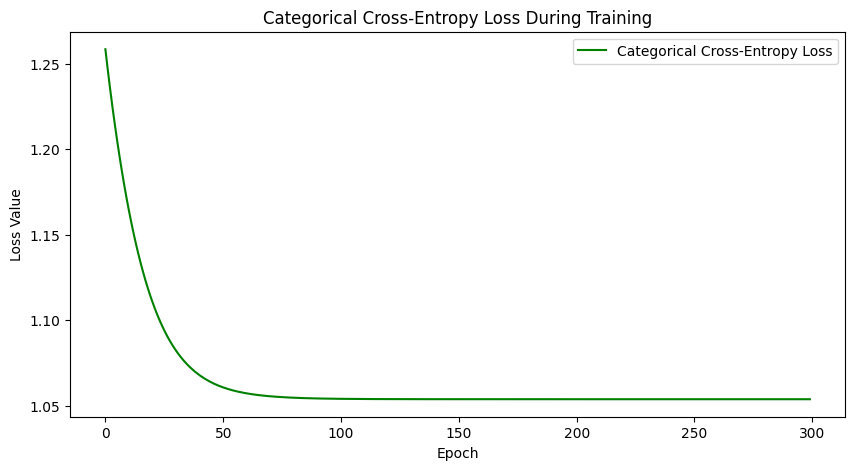

In [541]:
model_multi = nn.Sequential(nn.Linear(3, 3))
criterion_cce = nn.CrossEntropyLoss()
optimizer_multi = torch.optim.SGD(model_multi.parameters(), lr=0.1)

epochs = 300
loss_values_cce = []

for epoch in range(epochs):
    optimizer_multi.zero_grad()
    outputs = model_multi(x_multi)
    loss = criterion_cce(outputs, y_multi)
    loss_values_cce.append(loss.item())
    loss.backward()
    optimizer_multi.step()

plt.figure(figsize=(10, 5))
plt.plot(loss_values_cce, label="Categorical Cross-Entropy Loss", color="green")
plt.title("Categorical Cross-Entropy Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.show()
    